# Домашнее задание 2 (часть 2) по теме: "Визуализация"

В этом домашнем задании я визуализировал информацию, которую получил из текста книги **И. С. Тургенева "Дворянское гнездо"** и ее морфологического разбора.

## Задание 1. Датафрейм

Первые две ячейки идентичны ячейкам из первой части, поэтому комментировать не имеет смысла.

In [340]:
with open('Dvorjanskoe_gnezdo.txt', encoding='utf-8') as f:
    text = f.read()

In [341]:
import nltk
# nltk.download('punkt')
from nltk.tokenize import word_tokenize
words = [w.lower() for w in word_tokenize(text) if w.isalpha()]

analize_list = []
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()   
for token in words:
    token_analized = morph.parse(token)[0]
    analize_list.append(token_analized)

С помощью модуля *pandas* создаю датафрейм *analize_df* из списка словарей *list_frame*, словари которого созданы с помощью методов модуля *pymorphy2*. Вывожу первые 15 строк.

In [345]:
import pandas as pd
import collections
list_frame = []
lemmas = []
for token in analize_list:
    lemmas.append(token.normal_form)
    ch_dict = collections.OrderedDict()
    ch_dict["lex"]=token.normal_form
    ch_dict["word"]=token.word
    ch_dict["POS"]=token.tag.POS
    ch_dict["time"]=token.tag.tense
    ch_dict["gender"]=token.tag.gender
    ch_dict["case"]=token.tag.case
    ch_dict["verbal"]=token.tag.mood
    ch_dict["animacy"]=token.tag.animacy
    ch_dict["aspect"]=token.tag.aspect
    ch_dict["involvement"]=token.tag.involvement
    ch_dict["person"]=token.tag.person
    ch_dict["transitivity"]=token.tag.transitivity
    ch_dict["voice"]=token.tag.voice
    list_frame.append(ch_dict)
analize_df = pd.DataFrame(list_frame).fillna('')
sp_an = pd.DataFrame(list_frame)
analize_df.head(15)

,lex,word,POS,time,gender,case,verbal,animacy,aspect,involvement,person,transitivity,voice
0,иван,иван,NOUN,,masc,nomn,,anim,,,,,
1,сергей,сергеевич,NOUN,,masc,nomn,,anim,,,,,
2,тургенев,тургенев,NOUN,,masc,nomn,,anim,,,,,
3,дворянский,дворянское,ADJF,,neut,nomn,,,,,,,
4,гнездо,гнездо,NOUN,,neut,accs,,inan,,,,,
5,i,i,,,,,,,,,,,
6,весенний,весенний,ADJF,,masc,nomn,,,,,,,
7,светлый,светлый,ADJF,,masc,nomn,,,,,,,
8,день,день,NOUN,,masc,accs,,inan,,,,,
9,клониться,клонился,VERB,past,masc,,indc,,impf,,,intr,


Для работы с графиками и диаграммами импортирую модули *matplotlib* и *seaborn*.

In [346]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Задание 2

Создаю круговую диаграмму по роду с помощью *.plot(kind='pie')*.

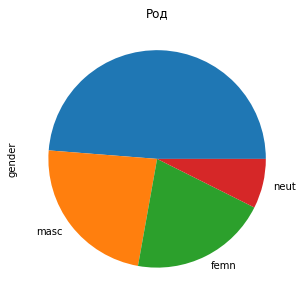

In [267]:
plt.figure(figsize=(5, 5))
analize_df['gender'].value_counts().plot(kind='pie');
plt.title('Род');

Создаю гистограмму "Распределение по длине лемм" с помощью *sns.distplot*.

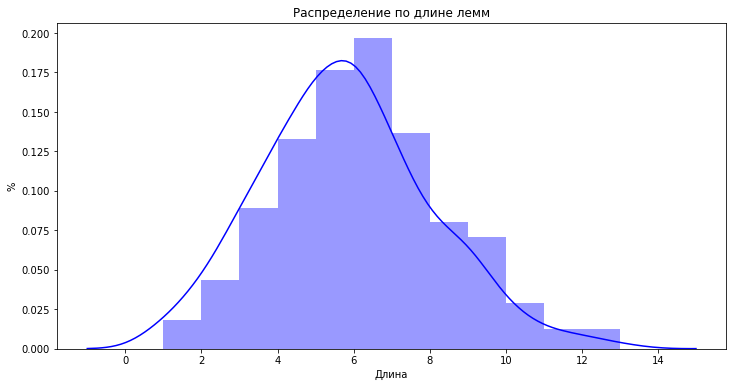

In [266]:
df2 = analize_df[['lex', 'POS', 'gender']].groupby(['lex', 'POS'], as_index=False).count()
df2.columns = ['lex', 'POS', 'total']
df2 = df2[df2['total'] > 10]
df2['length'] = df2['lex'].apply(len)
plt.figure(figsize=(12, 6))
sns.distplot(df2['length'], bins=12, color='blue')
plt.title('Распределение по длине лемм')
plt.ylabel('%')
plt.xlabel('Длина');

Создаю облако слов размером 10х10 без стоп-слов с помощью модуля *wordcloud*.

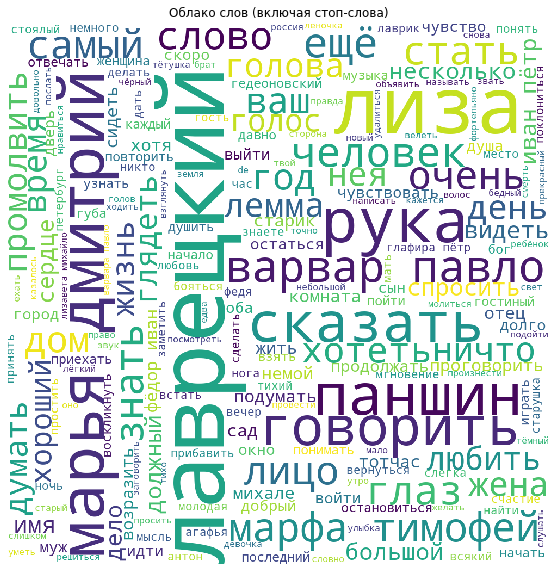

In [148]:
#!pip install wordcloud
from wordcloud import WordCloud
#nltk.download('stopwords')
from nltk.corpus import stopwords

stops = set(stopwords.words('russian') + ['это', 'весь', 'который', 'мочь', 'свой'])

text = ' '.join([word for word in analize_df['lex'].values if word not in stops])

wordcloud = WordCloud(
    background_color ='white',
    width = 1000,
    height = 1000, 
).generate(text)

plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Облако слов (включая стоп-слова)')
plt.show()

## Задание 3

Этот график показывает частотность глаголов по 10 равным частям текста. Таким образом, можно посмотреть динамику развития действия в произведении (или нельзя). Создаю график, где по оси Х отложены части, а по оси Y количество глаголов (количество глаголов найдено в цикле и сохранено в список *verbs*).

X: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Y: [651, 638, 585, 656, 705, 727, 768, 684, 752, 718]


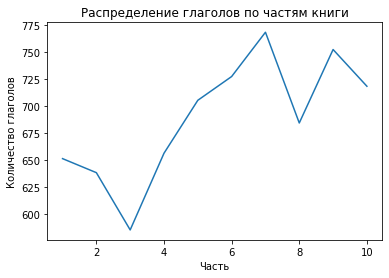

In [324]:
len(analize_list)
n = 1
list_book = [0]
verbs = []
while n <= 10:
    x = len(words) / 10 * n
    list_book.append(x)
    df3 = analize_df['POS'][int(list_book[n-1]):int(list_book[n])]
    df3_new = df3.loc[analize_df['POS'] == 'VERB']
    verbs.append(len(df3_new))
    n += 1
X = list(range(1, 11))
Y = verbs
print('X:', X)
print('Y:', Y)

plt.plot(X, Y)
plt.title('Распределение глаголов по частям книги') # заголовок
plt.ylabel('Количество глаголов') # подпись оси Х
plt.xlabel('Часть') # подпись оси Y
plt.show()

Распределение падежей существительных, созданное с помощью *.plot.bar(color='green')*.

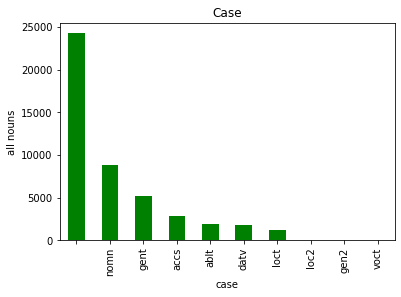

In [254]:
analize_df['case'].value_counts().plot.bar(color='green');
plt.title('Case')
plt.xlabel('case')
plt.ylabel('all nouns');

## Задание 4

Нахожу распредение вхождений имён героев по лематизированному тексту.

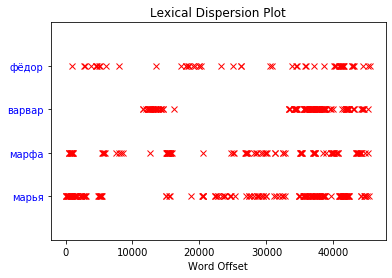

In [339]:
from nltk.probability import FreqDist


words = ["марья", "марфа", "варвар", "фёдор"]

points = [(x, y) for x in range(len(lemmas))
          for y in range(len(words)) if lemmas[x] == words[y]]

if points:
    x, y = zip(*points)
else:
    x = y = ()

plt.plot(x, y, "rx", scalex=.1)
plt.yticks(range(len(words)), words, color="b")
plt.ylim(-1, len(words))
plt.title("Lexical Dispersion Plot")
plt.xlabel("Word Offset")
plt.show()
